In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
df=pd.read_excel('data_cleaning.xlsx',sheet_name='Usage',header=None)
df.columns=['Usage']

In [7]:
pattern=re.compile(r'(?P<clock>\d+)\s?([AMP]{2})\s+[A-Za-z]*\s*(?P<day>\d+)(?:th|rd|st|nd)*-(?P<month>[A-Za-z]{3})-(?P<year>\d{4})_+(?P<kwh>\d+\.\d+)')
clock=[]
am_pm=[]
day=[]
month=[]
year=[]
kwh=[]
for row in df.values.reshape(1,-1)[0]:
    result=pattern.findall(row)[0]
    clock.append(result[0])
    am_pm.append(result[1])
    day.append(result[2])
    month.append(result[3])
    year.append(result[4])
    kwh.append(result[5])

clean_df=pd.DataFrame({'clock':clock,
                       'AM/PM':am_pm,
                       'day':day,
                       'month':month,
                       'year':year,
                       'kwh':kwh,
                       'orijinal_data':df.values.reshape(1,-1)[0]})

time_func= lambda x:pd.to_datetime(f"{x['year']}-{x['month']}-{x['day']} {x['clock']}{x['AM/PM']}")
clean_df['full_time']=clean_df.apply(func= time_func,axis=1)

clean_df.head(10)

clock AM/PM day month  year    kwh  \
0     3    PM  24   Mar  2014  0.384   
1     5    AM  15   Aug  2014  1.201   
2     8    PM  20   Mar  2014  1.523   
3     6    PM  23   Apr  2014  0.424   
4     1    AM  19   Dec  2014  0.209   
5     5    AM  19   Aug  2014  1.228   
6    12    PM   7   Jul  2014  1.296   
7     7    AM  25   Nov  2014  0.437   
8     8    AM  14   Aug  2014  0.523   
9     4    PM  25   Jan  2014  2.052   

                               orijinal_data           full_time  
0      3 PM  Mon 24th-Mar-2014___0.384 kwh   2014-03-24 15:00:00  
1             5AM  15-Aug-2014___1.201  kwh  2014-08-15 05:00:00  
2       __8PM Thu 20-Mar-2014____1.523 kwh   2014-03-20 20:00:00  
3            6PM  23rd-Apr-2014___0.424  kwh 2014-04-23 18:00:00  
4  _1AM  Friday 19th-Dec-2014___0.209  kwh   2014-12-19 01:00:00  
5      _5AM  Tue 19th-Aug-2014___1.228  kwh  2014-08-19 05:00:00  
6        12PM  Mon 7th-Jul-2014___1.296 kwh  2014-07-07 12:00:00  
7           7 AM  Tue 25-Nov-2014__0.437 kwh 2014-11-25 07:00:00  
8              _8AM  14-Aug-2014__0.523 kwh  2014-08-14 08:00:00  
9           __4PM  25th-Jan-2014__2.052kwh   2014-01-25 16:00:00

In [8]:
time_series_data=clean_df.set_index('full_time')
time_series_data['kwh']=time_series_data['kwh'].astype('float')
time_series_data['week_day']=(time_series_data.index.weekday+1)
time_series_data.sort_index(ascending=True,inplace=True)
time_series_data.head(10)

clock AM/PM day month  year    kwh  \
full_time                                                
2014-01-01 00:00:00    12    AM   1   Jan  2014  0.684   
2014-01-01 01:00:00     1    AM   1   Jan  2014  0.340   
2014-01-01 02:00:00     2    AM  01   Jan  2014  0.332   
2014-01-01 03:00:00     3    AM   1   Jan  2014  0.396   
2014-01-01 04:00:00     4    AM  01   Jan  2014  0.388   
2014-01-01 05:00:00     5    AM  01   Jan  2014  2.354   
2014-01-01 06:00:00     6    AM   1   Jan  2014  2.304   
2014-01-01 07:00:00     7    AM   1   Jan  2014  1.530   
2014-01-01 08:00:00     8    AM   1   Jan  2014  0.656   
2014-01-01 09:00:00     9    AM  01   Jan  2014  0.510   

                                                  orijinal_data  week_day  
full_time                                                                  
2014-01-01 00:00:00            __12AM  1st-Jan-2014_0.684 kwh           3  
2014-01-01 01:00:00     _1AM  Wednesday 1st-Jan-2014__0.34  kwh         3  
2014-01-01 02:00:00          2 AM  Wed 01-Jan-2014_0.332  kwh           3  
2014-01-01 03:00:00    _3AM   Wednesday 1-Jan-2014___0.396  kwh         3  
2014-01-01 04:00:00             __4AM   01-Jan-2014_0.388  kwh          3  
2014-01-01 05:00:00              _5 AM  01st-Jan-2014_2.354 kwh         3  
2014-01-01 06:00:00             6 AM Wed 1-Jan-2014__2.304  kwh         3  
2014-01-01 07:00:00          7 AM Wed 1st-Jan-2014___1.53  kwh          3  
2014-01-01 08:00:00       _8AM  Wed 1st-Jan-2014___0.656  kwh           3  
2014-01-01 09:00:00          _9 AM   01st-Jan-2014____0.51 kwh          3

In [9]:
time_series_kwh=time_series_data['kwh']
time_series_kwh.head(10)

full_time
2014-01-01 00:00:00    0.684
2014-01-01 01:00:00    0.340
2014-01-01 02:00:00    0.332
2014-01-01 03:00:00    0.396
2014-01-01 04:00:00    0.388
2014-01-01 05:00:00    2.354
2014-01-01 06:00:00    2.304
2014-01-01 07:00:00    1.530
2014-01-01 08:00:00    0.656
2014-01-01 09:00:00    0.510
Name: kwh, dtype: float64

# Visualize

<IPython.core.display.Javascript object>


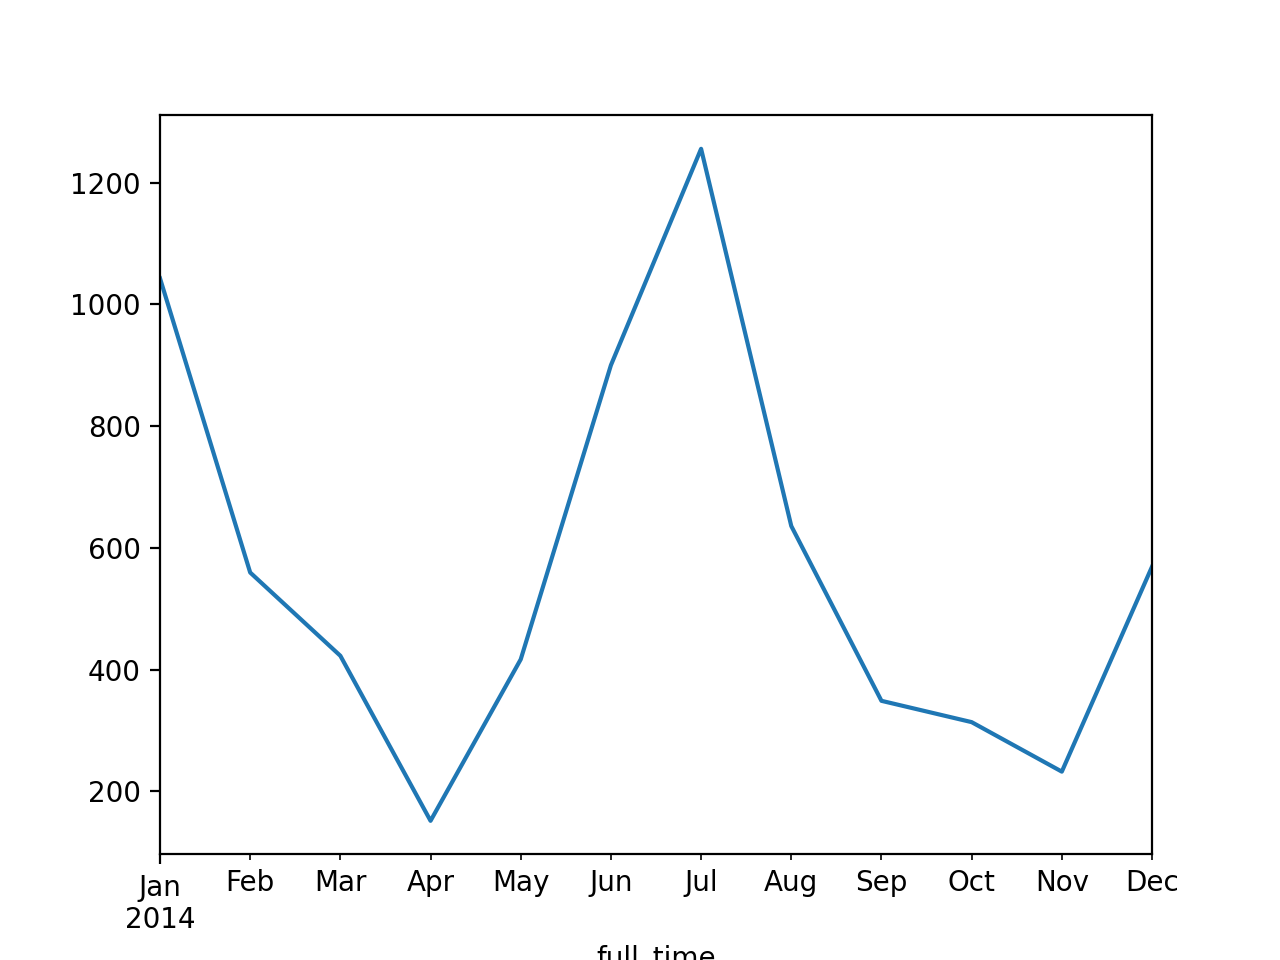

<AxesSubplot:xlabel='full_time'>

In [11]:
%matplotlib notebook
time_series_kwh.resample('m').sum().plot()

<IPython.core.display.Javascript object>


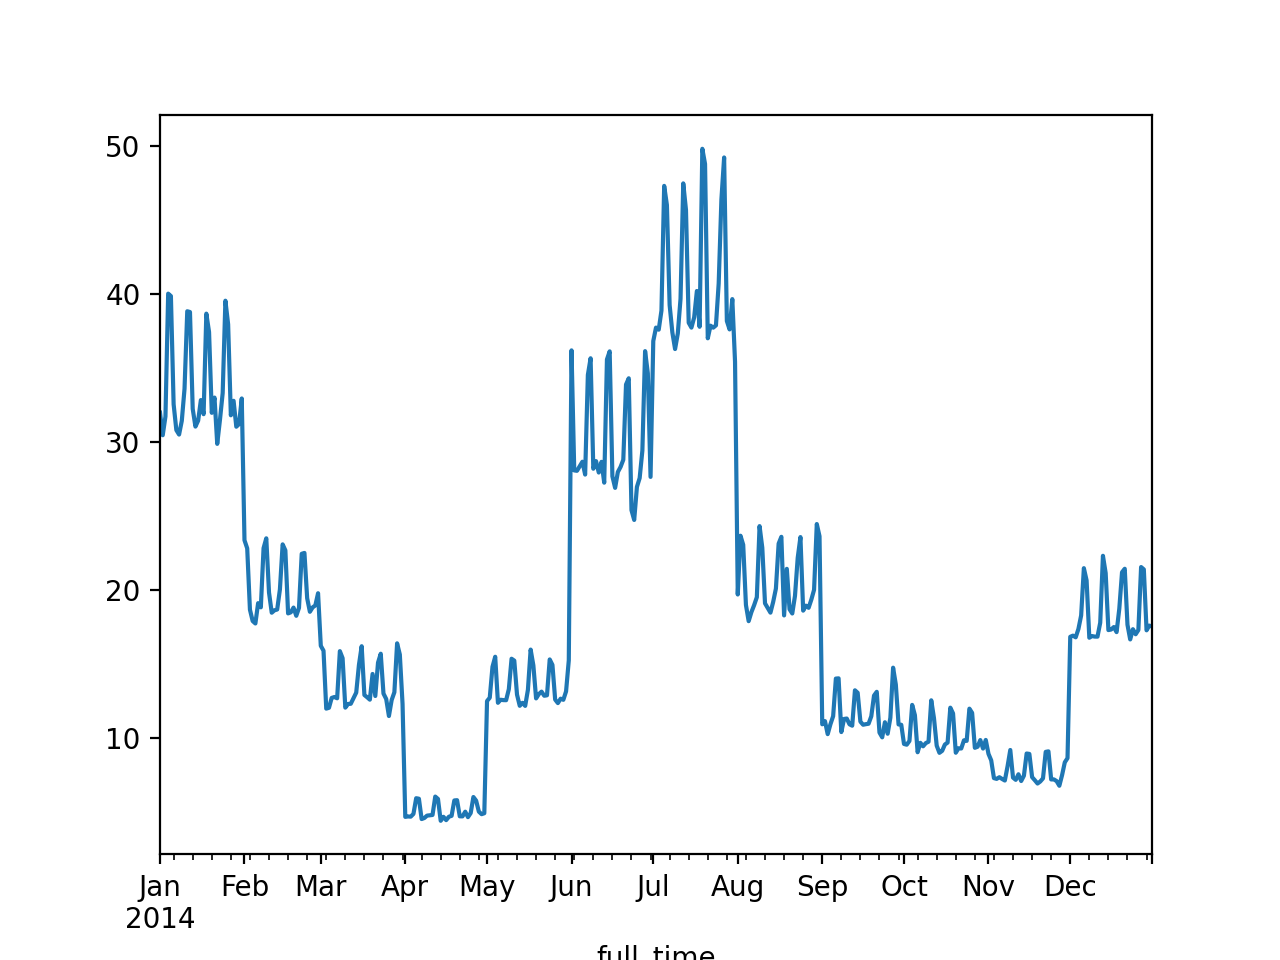

<AxesSubplot:xlabel='full_time'>

In [12]:
%matplotlib notebook
time_series_kwh.resample('d').sum().plot()

<IPython.core.display.Javascript object>


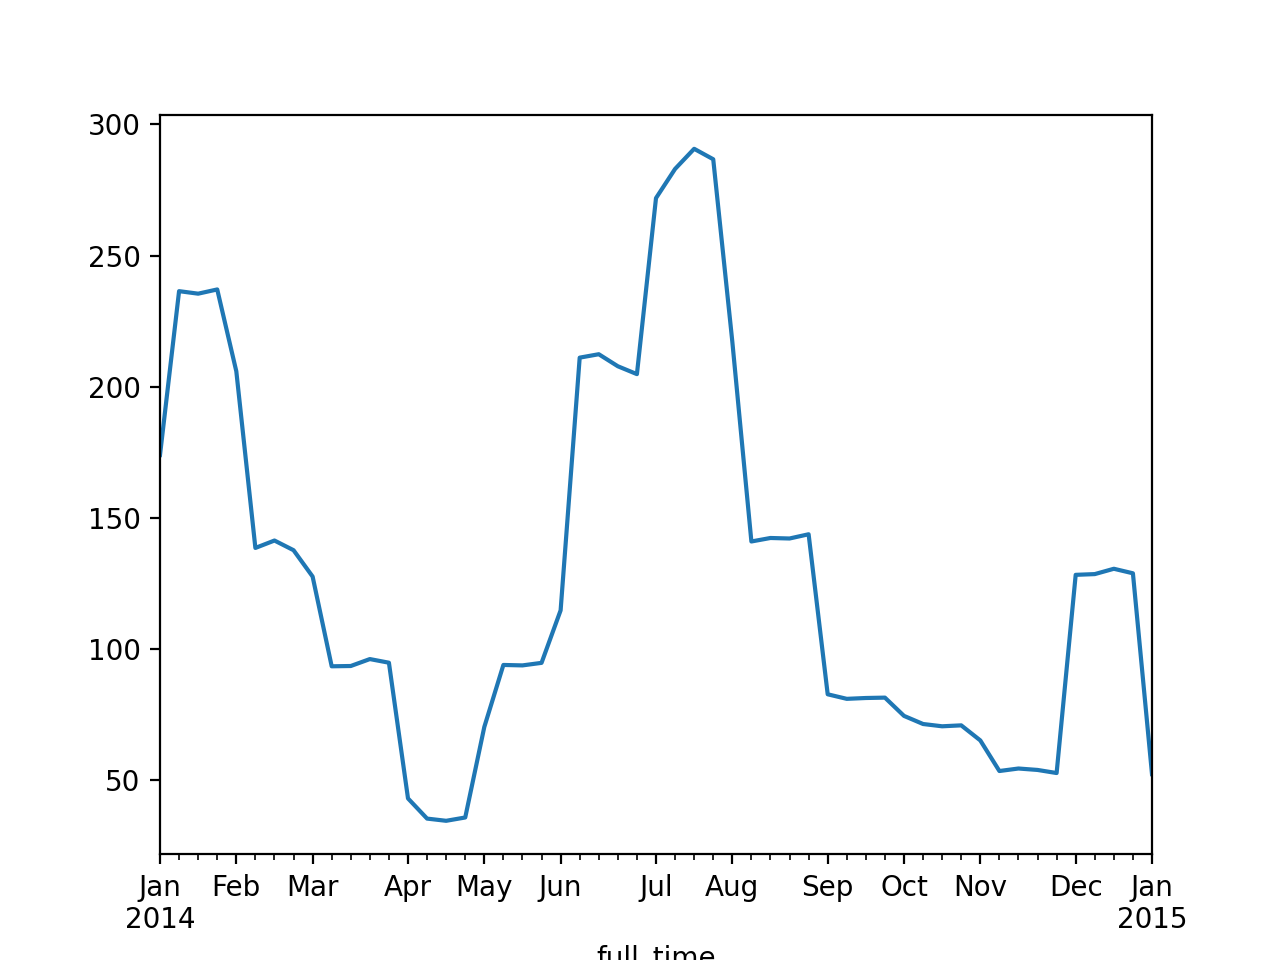

<AxesSubplot:xlabel='full_time'>

In [13]:
%matplotlib notebook
time_series_kwh.resample('W').sum().plot()

<IPython.core.display.Javascript object>


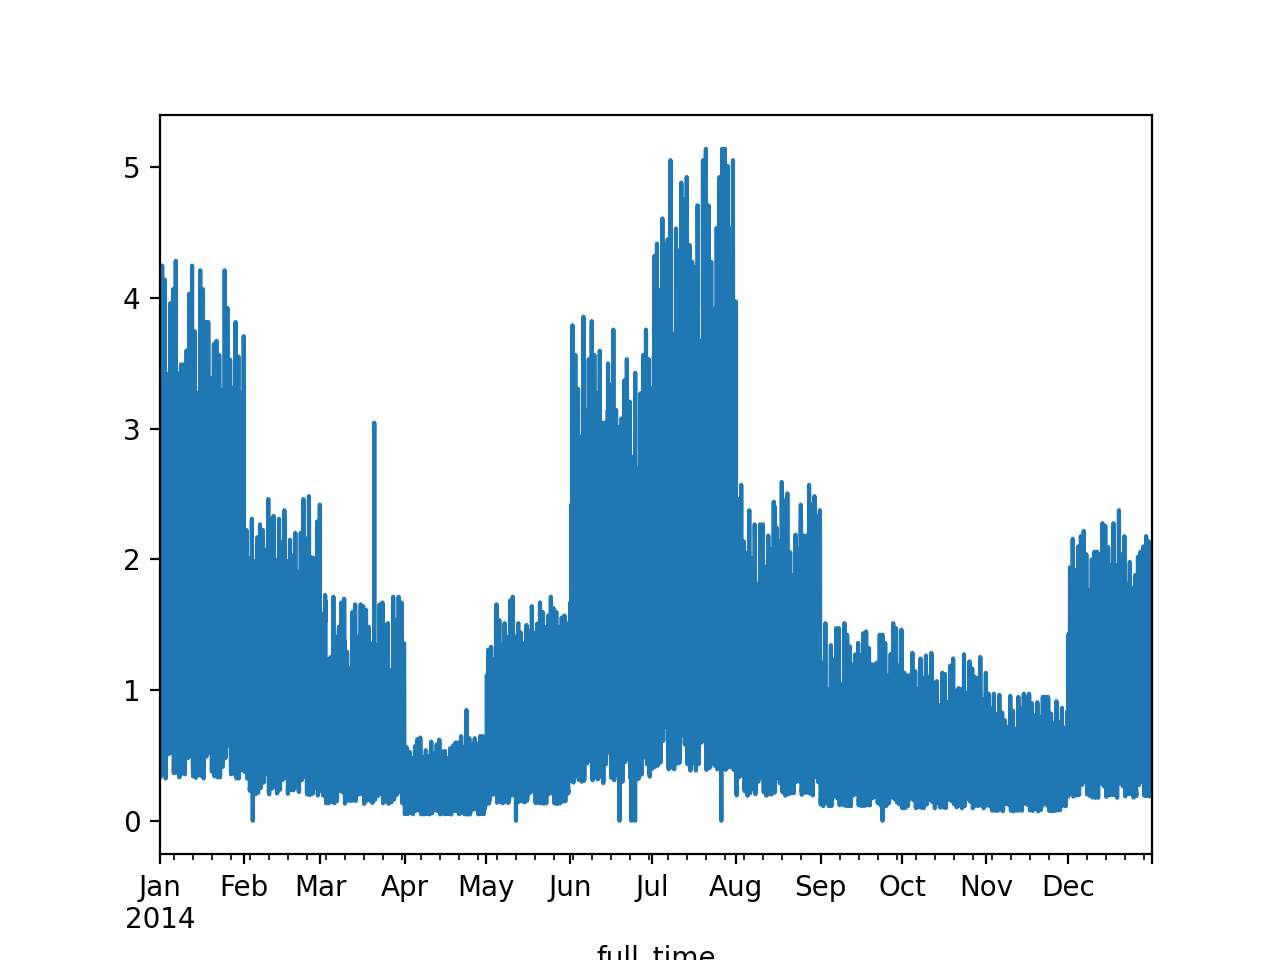

<AxesSubplot:xlabel='full_time'>

In [14]:
%matplotlib notebook
time_series_kwh.resample('h').sum().plot()

# Calculate

In [10]:
#hourly
hourly_prices=pd.Series([0.1 , 0.1 , 0.1 , 0.1 , 0.15, 0.2 , 0.24, 0.24, 0.26, 0.2 , 0.2 ,
       0.26, 0.26, 0.2 , 0.24, 0.18, 0.15, 0.3 , 0.24, 0.24, 0.12, 0.11,
       0.1 , 0.1 ],name='hourly prices')

horly_kwh=time_series_kwh.groupby(time_series_kwh.index.hour).sum()
hourly_consumption=(horly_kwh*hourly_prices).sum()

In [11]:
#monthly
monthly_prices=pd.Series([0.2 , 0.19, 0.17, 0.18, 0.22, 0.27, 0.24, 0.19, 0.18, 0.15, 0.14,0.19],index=range(1,13),
                        name='monthly prices')

monthly_kwh=time_series_kwh.groupby(time_series_kwh.index.month).sum()
monthly_consumption=(monthly_kwh*monthly_prices).sum()

In [12]:
#yearly
yearly_consumption=time_series_kwh.sum()*0.21

# Report

In [13]:
print(f'illik serfiyyat:{time_series_kwh.sum()} kwh')

illik serfiyyat:6848.114 kwh


In [14]:
print(f'illik kontrakt ile  xerc:{yearly_consumption} USD')

illik kontrakt ile  xerc:1438.10394 USD


In [15]:
print(f'ayliq kontrakt ile  xerc:{monthly_consumption} USD')

ayliq kontrakt ile  xerc:1421.20577 USD


In [16]:
print(f'saatliq kontrakt ile xerc:{hourly_consumption} USD')

saatliq kontrakt ile xerc:1368.97647 USD


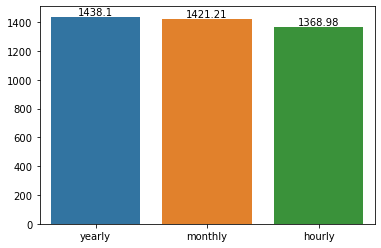

In [17]:
d={'yearly':yearly_consumption,
  'monthly':monthly_consumption,
  'hourly':hourly_consumption}

fig, ax = plt.subplots()
bar=sns.barplot(list(d.keys()),list(d.values()),ax=ax)
bar.bar_label(bar.containers[0])
plt.show()

# Question Answer

In [18]:
#1
round(time_series_kwh.mean(),3)

0.782

In [19]:
#2
round(time_series_kwh['2014/02'].mean(),3)

0.834

In [20]:
#3
time_series_data.groupby('week_day').mean().sort_values('kwh',ascending=False)

kwh
week_day          
7         0.898601
6         0.890300
5         0.753666
4         0.746375
3         0.733699
1         0.725894
2         0.724843

In [21]:
#4
h4=[]
for i in range(8760-3):
    h4.append(time_series_kwh[i:i+4].sum())
pd.Series(h4).sort_values(ascending=False).iloc[0]

17.237000000000002

In [22]:
#5
print(f'ayliq kontrakt ile  xerc:{monthly_consumption} USD')

ayliq kontrakt ile  xerc:1421.20577 USD
